In [20]:
import pandas as pd
from pandas_datareader import data as web
import yfinance as yf
yf.pdr_override()
import mplfinance as mpf

In [3]:
start = '2020-01-01'
end = '2021-01-01'

In [4]:
data = web.get_data_yahoo('NVDA', start=start, end=end)
data.head

[*********************100%***********************]  1 of 1 completed


<bound method NDFrame.head of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-12-31   57.724998   58.919998   57.532501   58.825001   58.666851   
2020-01-02   59.687500   59.977501   59.180000   59.977501   59.816254   
2020-01-03   58.775002   59.457500   58.525002   59.017502   58.858829   
2020-01-06   58.080002   59.317501   57.817501   59.264999   59.105667   
2020-01-07   59.549999   60.442501   59.097500   59.982498   59.821236   
...                ...         ...         ...         ...         ...   
2020-12-24  130.372498  131.324997  129.387497  129.937500  129.802017   
2020-12-28  130.625000  130.625000  127.632500  129.000000  128.865463   
2020-12-29  129.250000  130.725006  128.422501  129.432495  129.297516   
2020-12-30  129.902496  132.137497  128.967499  131.457504  131.320404   
2020-12-31  131.365005  131.509995  129.149994  130.550003  130.413879   

       

In [5]:
def rsi_func(df, days=14, lower=30, upper=70):
    chg = df['Close'].diff(1)
    
    gain = chg.mask(chg<0,0) # if value < 0 then 0
    loss = chg.mask(chg>0,0) # if value > 0 then 0
    avg_gain = gain.rolling(days).mean() # by default min_periods = window
    avg_loss = abs(loss.rolling(days).mean())
    rs = avg_gain/avg_loss
    rsi = 100 - (100/(1+rs))
    df['rsi'] = rsi
    
    # Find action zone
    df.loc[(df['rsi'] > upper), 'action'] = 'sell'
    df.loc[(df['rsi'] < lower), 'action'] = 'buy'
    df.loc[df['action'] == 'buy', 'marker_position'] = df['Low'] * 0.98
    df.loc[df['action'] == 'sell', 'marker_position'] = df['High'] * 1.02
    
    return df

In [17]:
df = data.copy()
rsi_starter = rsi_func(df, days=14)
rsi_starter[rsi_starter.action.notnull()].head()

,Open,High,Low,Close,Adj Close,Volume,rsi,action,marker_position
Date,,,,,,,,,
2020-01-24,64.375000,64.875000,62.075001,62.619999,62.451645,37351200,70.781658,sell,66.172500
2020-02-14,71.815002,73.742500,71.500000,72.447502,72.252724,104192400,80.219362,sell,75.217350
2020-02-18,71.410004,74.327499,71.214996,74.142502,73.943184,62016400,79.977776,sell,75.814049
2020-02-19,75.372498,78.852501,75.372498,78.675003,78.463486,69433200,85.737897,sell,80.429551
2020-02-20,78.192497,79.080002,74.087502,77.175003,76.967506,81005200,80.681034,sell,80.661602


In [39]:
def rsi_plot(df_plot, lower=30, mid=50, upper=70):
    df = rsi_func(df_plot)
    
    df['lower'] = lower
    df['upper'] = upper
    df['mid'] = mid
    rsi_ylim = (0,100)
    
    # for plot rsi
    mpf_rsi = mpf.make_addplot(df['rsi'], panel=1, color='blue', title='RSI', ylim=rsi_ylim)
    mpf_lower = mpf.make_addplot(df['lower'], panel=1, color='orange', ylim=rsi_ylim)
    mpf_upper = mpf.make_addplot(df['upper'], panel=1, color='orange', ylim=rsi_ylim)
    mpf_mid = mpf.make_addplot(df['mid'], panel=1, color='gray', ylim=rsi_ylim)
    
    # for marker
    markers = ['^' if x == 'buy' else 'v' for x in df['action']]
    color_marker = ['green' if x == 'buy' else 'red' for x in df['action']]
    plot_signal = mpf.make_addplot(df['marker_position'], type='scatter', marker=markers, color=color_marker)

    plots = [mpf_rsi, mpf_lower, mpf_mid, mpf_upper, plot_signal]
    
    return plots

In [40]:
df = data.copy()
rsi_to_plot = rsi_plot(df)

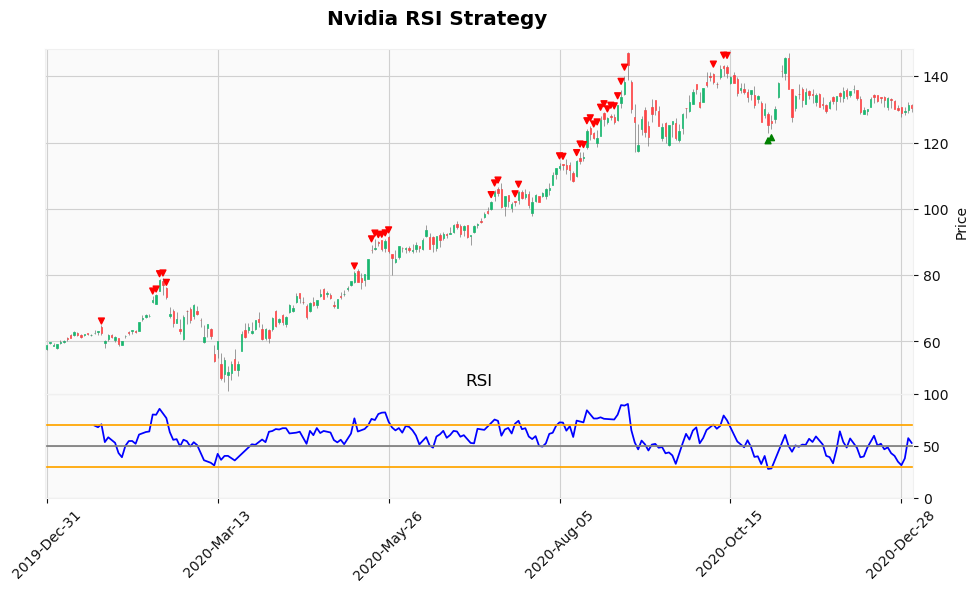

In [42]:
mpf.plot(df, type='candle', style='yahoo', addplot=rsi_to_plot, title="Nvidia RSI Strategy",
         figsize=(10,6), panel_ratios=(1,0.3),
         tight_layout=True, scale_padding={'top':5})

In [43]:
df = data.copy()
rsi_starter = rsi_func(df, days=14, lower=35, upper=75)
rsi_to_plot = rsi_plot(df, lower=35, mid=53, upper=75)

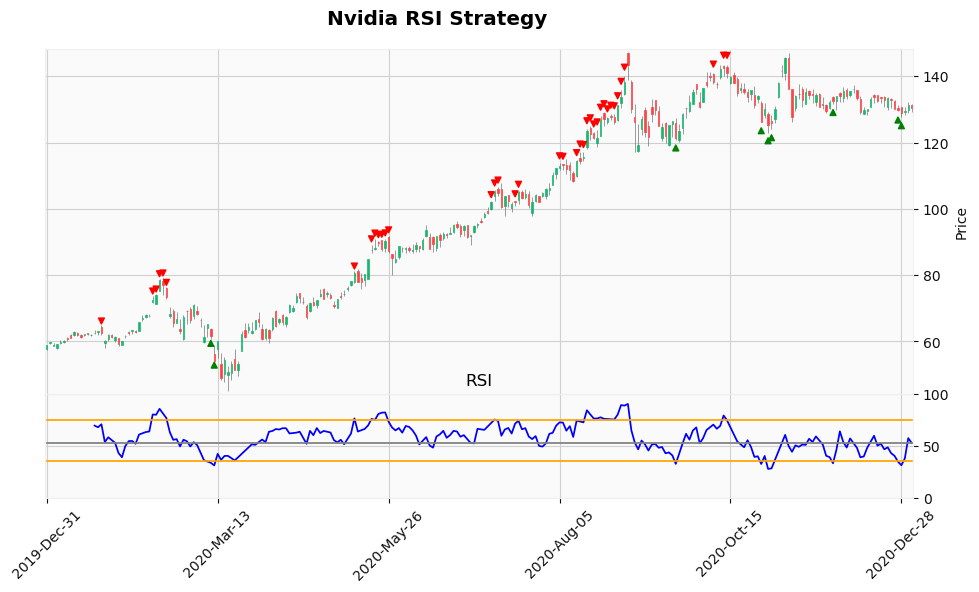

In [44]:
mpf.plot(df, type='candle', style='yahoo', addplot=rsi_to_plot, title="Nvidia RSI Strategy",
         figsize=(10,6), panel_ratios=(1,0.3),
         tight_layout=True, scale_padding={'top':5})

In [59]:
action_data = df.copy()
action_data

,Open,High,Low,Close,Adj Close,Volume,rsi,action,marker_position,lower,upper,mid
Date,,,,,,,,,,,,
2019-12-31,57.724998,58.919998,57.532501,58.825001,58.666851,23100400,NaN,NaN,NaN,35,75,53
2020-01-02,59.687500,59.977501,59.180000,59.977501,59.816254,23753600,NaN,NaN,NaN,35,75,53
2020-01-03,58.775002,59.457500,58.525002,59.017502,58.858829,20538400,NaN,NaN,NaN,35,75,53
2020-01-06,58.080002,59.317501,57.817501,59.264999,59.105667,26263600,NaN,NaN,NaN,35,75,53
2020-01-07,59.549999,60.442501,59.097500,59.982498,59.821236,31485600,NaN,NaN,NaN,35,75,53
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,130.372498,131.324997,129.387497,129.937500,129.802017,9788400,34.651973,buy,126.799747,35,75,53
2020-12-28,130.625000,130.625000,127.632500,129.000000,128.865463,21256400,31.245840,buy,125.079850,35,75,53
2020-12-29,129.250000,130.725006,128.422501,129.432495,129.297516,17037200,37.827300,NaN,NaN,35,75,53


In [60]:
action_data['action_price'] = action_data['Open'].shift(-1)
action_data.head()

,Open,High,Low,Close,Adj Close,Volume,rsi,action,marker_position,lower,upper,mid,action_price
Date,,,,,,,,,,,,,
2019-12-31,57.724998,58.919998,57.532501,58.825001,58.666851,23100400,NaN,NaN,NaN,35,75,53,59.687500
2020-01-02,59.687500,59.977501,59.180000,59.977501,59.816254,23753600,NaN,NaN,NaN,35,75,53,58.775002
2020-01-03,58.775002,59.457500,58.525002,59.017502,58.858829,20538400,NaN,NaN,NaN,35,75,53,58.080002
2020-01-06,58.080002,59.317501,57.817501,59.264999,59.105667,26263600,NaN,NaN,NaN,35,75,53,59.549999
2020-01-07,59.549999,60.442501,59.097500,59.982498,59.821236,31485600,NaN,NaN,NaN,35,75,53,59.939999


In [61]:
record = action_data[action_data.action.notnull()]
record

,Open,High,Low,Close,Adj Close,Volume,rsi,action,marker_position,lower,upper,mid,action_price
Date,,,,,,,,,,,,,
2020-01-24,64.375000,64.875000,62.075001,62.619999,62.451645,37351200,70.781658,sell,66.172500,35,75,53,59.560001
2020-02-14,71.815002,73.742500,71.500000,72.447502,72.252724,104192400,80.219362,sell,75.217350,35,75,53,71.410004
2020-02-18,71.410004,74.327499,71.214996,74.142502,73.943184,62016400,79.977776,sell,75.814049,35,75,53,75.372498
2020-02-19,75.372498,78.852501,75.372498,78.675003,78.463486,69433200,85.737897,sell,80.429551,35,75,53,78.192497
2020-02-20,78.192497,79.080002,74.087502,77.175003,76.967506,81005200,80.681034,sell,80.661602,35,75,53,76.047501
2020-02-21,76.047501,76.300003,72.665001,73.517502,73.319855,76818000,76.749576,sell,77.826003,35,75,53,67.547501
2020-03-11,63.865002,64.150002,60.642502,61.617500,61.488594,49996400,33.589994,buy,59.429652,35,75,53,56.365002
2020-03-12,56.365002,59.029999,53.950001,54.077499,53.964375,81654000,31.047083,buy,52.871001,35,75,53,57.625000
2020-05-11,78.074997,81.125000,77.787498,80.654999,80.486275,46906000,76.504649,sell,82.747500,35,75,53,81.235001


In [62]:
record['helper'] = record.action.shift(-1)
record

C:\Users\gunsr\AppData\Local\Temp\ipykernel_16124\2114248699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  record['helper'] = record.action.shift(-1)


,Open,High,Low,Close,Adj Close,Volume,rsi,action,marker_position,lower,upper,mid,action_price,helper
Date,,,,,,,,,,,,,,
2020-01-24,64.375000,64.875000,62.075001,62.619999,62.451645,37351200,70.781658,sell,66.172500,35,75,53,59.560001,sell
2020-02-14,71.815002,73.742500,71.500000,72.447502,72.252724,104192400,80.219362,sell,75.217350,35,75,53,71.410004,sell
2020-02-18,71.410004,74.327499,71.214996,74.142502,73.943184,62016400,79.977776,sell,75.814049,35,75,53,75.372498,sell
2020-02-19,75.372498,78.852501,75.372498,78.675003,78.463486,69433200,85.737897,sell,80.429551,35,75,53,78.192497,sell
2020-02-20,78.192497,79.080002,74.087502,77.175003,76.967506,81005200,80.681034,sell,80.661602,35,75,53,76.047501,sell
2020-02-21,76.047501,76.300003,72.665001,73.517502,73.319855,76818000,76.749576,sell,77.826003,35,75,53,67.547501,buy
2020-03-11,63.865002,64.150002,60.642502,61.617500,61.488594,49996400,33.589994,buy,59.429652,35,75,53,56.365002,buy
2020-03-12,56.365002,59.029999,53.950001,54.077499,53.964375,81654000,31.047083,buy,52.871001,35,75,53,57.625000,sell
2020-05-11,78.074997,81.125000,77.787498,80.654999,80.486275,46906000,76.504649,sell,82.747500,35,75,53,81.235001,sell


In [63]:
record = record.loc[record['helper']!=record['action']]
record = record.iloc[1:] # focus on 'buy' action for the fist.
record

,Open,High,Low,Close,Adj Close,Volume,rsi,action,marker_position,lower,upper,mid,action_price,helper
Date,,,,,,,,,,,,,,
2020-03-12,56.365002,59.029999,53.950001,54.077499,53.964375,81654000,31.047083,buy,52.871001,35,75,53,57.625000,sell
2020-09-02,147.037506,147.267502,139.000000,143.464996,143.273056,87401200,90.438711,sell,150.212852,35,75,53,138.287506,buy
2020-09-23,125.754997,127.269997,120.792503,121.237503,121.075302,64701200,32.571461,buy,118.376653,35,75,53,120.722504,sell
2020-10-14,142.904999,143.427505,139.600006,140.952499,140.763916,27610000,74.538299,sell,146.296056,35,75,53,138.107498,buy
2020-12-28,130.625000,130.625000,127.632500,129.000000,128.865463,21256400,31.245840,buy,125.079850,35,75,53,129.250000,NaN


In [64]:
record['return'] = record['action_price'].pct_change()
record

,Open,High,Low,Close,Adj Close,Volume,rsi,action,marker_position,lower,upper,mid,action_price,helper,return
Date,,,,,,,,,,,,,,,
2020-03-12,56.365002,59.029999,53.950001,54.077499,53.964375,81654000,31.047083,buy,52.871001,35,75,53,57.625000,sell,NaN
2020-09-02,147.037506,147.267502,139.000000,143.464996,143.273056,87401200,90.438711,sell,150.212852,35,75,53,138.287506,buy,1.399783
2020-09-23,125.754997,127.269997,120.792503,121.237503,121.075302,64701200,32.571461,buy,118.376653,35,75,53,120.722504,sell,-0.127018
2020-10-14,142.904999,143.427505,139.600006,140.952499,140.763916,27610000,74.538299,sell,146.296056,35,75,53,138.107498,buy,0.144008
2020-12-28,130.625000,130.625000,127.632500,129.000000,128.865463,21256400,31.245840,buy,125.079850,35,75,53,129.250000,NaN,-0.064135


In [65]:
record.reset_index(inplace=True)

In [66]:
record['previous_signal_date'] = record['Date'].shift(1)
record['previous_action'] = record['action'].shift(1)
record['previous_action_price'] = record['action_price'].shift(1)
record.rename(columns={'Date': 'today_signal_date'}, inplace=True)

record

,today_signal_date,Open,High,Low,Close,Adj Close,Volume,rsi,action,marker_position,lower,upper,mid,action_price,helper,return,previous_signal_date,previous_action,previous_action_price
0,2020-03-12,56.365002,59.029999,53.950001,54.077499,53.964375,81654000,31.047083,buy,52.871001,35,75,53,57.625000,sell,NaN,NaT,NaN,NaN
1,2020-09-02,147.037506,147.267502,139.000000,143.464996,143.273056,87401200,90.438711,sell,150.212852,35,75,53,138.287506,buy,1.399783,2020-03-12,buy,57.625000
2,2020-09-23,125.754997,127.269997,120.792503,121.237503,121.075302,64701200,32.571461,buy,118.376653,35,75,53,120.722504,sell,-0.127018,2020-09-02,sell,138.287506
3,2020-10-14,142.904999,143.427505,139.600006,140.952499,140.763916,27610000,74.538299,sell,146.296056,35,75,53,138.107498,buy,0.144008,2020-09-23,buy,120.722504
4,2020-12-28,130.625000,130.625000,127.632500,129.000000,128.865463,21256400,31.245840,buy,125.079850,35,75,53,129.250000,NaN,-0.064135,2020-10-14,sell,138.107498


In [68]:
record = record[['action', 'today_signal_date', 'action_price', 'return', 'previous_signal_date', 'previous_action', 'previous_action_price']]
record

,action,today_signal_date,action_price,return,previous_signal_date,previous_action,previous_action_price
0,buy,2020-03-12,57.625000,NaN,NaT,NaN,NaN
1,sell,2020-09-02,138.287506,1.399783,2020-03-12,buy,57.625000
2,buy,2020-09-23,120.722504,-0.127018,2020-09-02,sell,138.287506
3,sell,2020-10-14,138.107498,0.144008,2020-09-23,buy,120.722504
4,buy,2020-12-28,129.250000,-0.064135,2020-10-14,sell,138.107498


In [70]:
profit = record[record.action == 'sell']
profit

,action,today_signal_date,action_price,return,previous_signal_date,previous_action,previous_action_price
1,sell,2020-09-02,138.287506,1.399783,2020-03-12,buy,57.625000
3,sell,2020-10-14,138.107498,0.144008,2020-09-23,buy,120.722504


<AxesSubplot:>

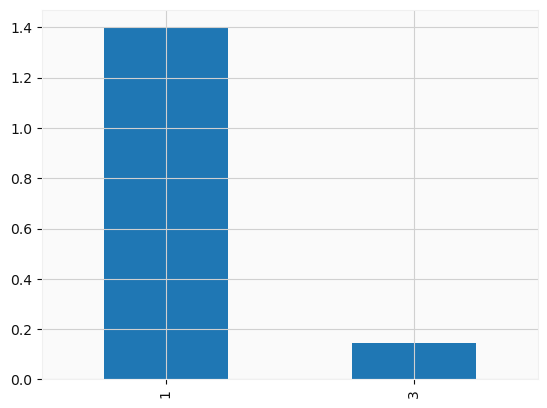

In [71]:
profit['return'].plot(kind='bar')